In [245]:
"""Problem Statement

To build a Linear Regression model that will be able to Predict the Sale Price of the house based on its characteristics.

"""

'Problem Statement\n\nTo build a Linear Regression model that will be able to Predict the Sale Price of the house based on its characteristics.\n\n'

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [247]:
raw_housing_data=pd.read_csv("Raw_Housing_Data_Original.csv")
raw_housing_data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [249]:
raw_housing_data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [251]:
raw_housing_data.head(10)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
5,7237550310,14 May 2017,1230000.0,4,4.50,5420.0,101930.0,1.0,No,None,...,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930
6,1321400060,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,None,...,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819
7,2008000270,15 January 2016,291850.0,3,1.50,1060.0,9711.0,1.0,No,None,...,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711
8,2414600126,15 April 2016,229500.0,3,1.00,1780.0,7470.0,1.0,No,None,...,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113
9,3793500160,15 March 2016,323000.0,3,2.50,1890.0,6560.0,2.0,No,None,...,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570


In [252]:
raw_housing_data.tail(10)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
21603,7852140040,14 August 2017,507250.0,3,2.50,2270.0,5536.0,2.0,No,None,...,8,2270.0,0,15,0,98065.0,47.5389,-121.881,2270.0,5731
21604,9834201367,15 January 2016,429000.0,3,2.00,1490.0,1126.0,3.0,No,None,...,8,1490.0,0,4,0,98144.0,47.5699,-122.288,1400.0,1230
21605,3448900210,14 October 2017,610685.0,4,2.50,2520.0,6023.0,2.0,No,None,...,9,2520.0,0,4,0,98056.0,47.5137,-122.167,2520.0,6023
21606,7936000429,15 March 2016,1010000.0,4,3.50,3510.0,7200.0,2.0,No,None,...,9,2600.0,910,9,0,98136.0,47.5537,-122.398,2050.0,6200
21607,2997800021,15 February 2016,475000.0,3,2.50,1310.0,1294.0,2.0,No,None,...,8,1180.0,130,10,0,98116.0,47.5773,-122.409,1330.0,1265
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287
21612,1523300157,14 October 2017,325000.0,2,0.75,1020.0,1076.0,2.0,No,None,...,7,1020.0,0,10,0,98144.0,47.5941,-122.299,1020.0,1357


In [253]:
raw_housing_data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [254]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [255]:
raw_housing_data["Sale Price"].mean()

540198.4357443658

In [10]:
raw_housing_data["Sale Price"].min()

75000.0

In [11]:
raw_housing_data["Sale Price"].max()

7700000.0

In [12]:
raw_housing_data["Sale Price"].std()

367388.99446065375

In [13]:
raw_housing_data["Sale Price"].quantile(.25)

321950.0

In [15]:
raw_housing_data["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [16]:
import numpy as np
np.std(raw_housing_data["Sale Price"])

367380.4935294451

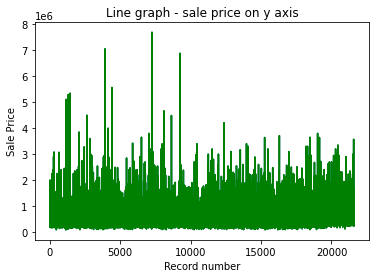

In [17]:
import matplotlib.pyplot as plt
plt.plot(raw_housing_data["Sale Price"])
plt.plot(raw_housing_data["Sale Price"], color="green")
plt.xlabel("Record number")
plt.ylabel("Sale Price")
plt.title("Line graph - sale price on y axis")
plt.show()

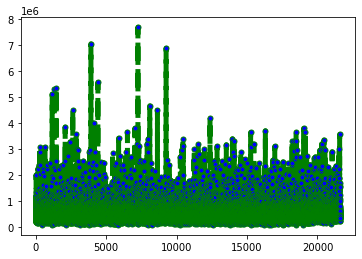

In [18]:
plt.plot(raw_housing_data["Sale Price"], marker="o", markerfacecolor="Blue", markersize=5, color="green", linewidth=5, linestyle="dashed")

In [19]:
raw_housing_data.groupby("Condition of the House")["ID"].count()

Condition of the House
Bad             30
Excellent     1701
Fair         14031
Good          5679
Okay           172
Name: ID, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe13edc0790>,
 [Text(1.099989541385049, 0.004796753434368107, 'Bad'),
  Text(1.0641591373844368, 0.27850553014475643, 'Excellent'),
  Text(-0.9085709380486652, 0.620079713047741, 'Fair'),
  Text(0.7046888223897579, -0.8446381850229934, 'Good'),
  Text(1.0996562341282203, -0.02749848619362501, 'Okay')])

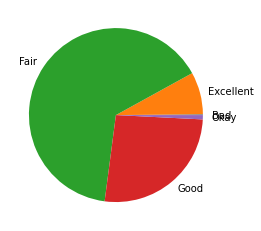

In [20]:
values=(30, 1701, 14031, 5679, 172)
labels=("Bad", "Excellent", "Fair", "Good", "Okay")
#for building the Pie Chart
plt.pie(values, labels=labels)

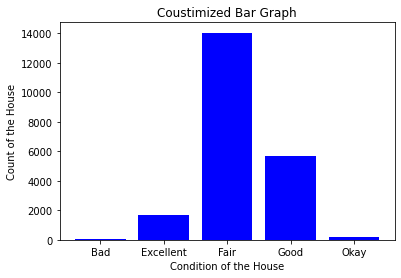

In [21]:
#Coustimizing the Bar Graph
plt.bar(labels, values, color="Blue", linewidth=5, linestyle="dashed")
plt.xlabel("Condition of the House")
plt.ylabel("Count of the House")
plt.title("Coustimized Bar Graph")
plt.show()

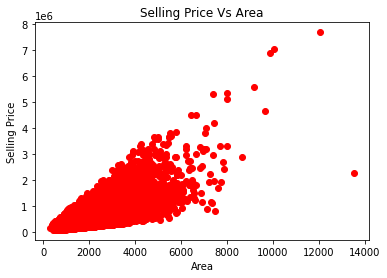

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x=raw_housing_data["Flat Area (in Sqft)"], 
           y=raw_housing_data["Sale Price"], 
           color="red")
plt.xlabel("Area")
plt.ylabel("Selling Price")
plt.title("Selling Price Vs Area")
plt.show()

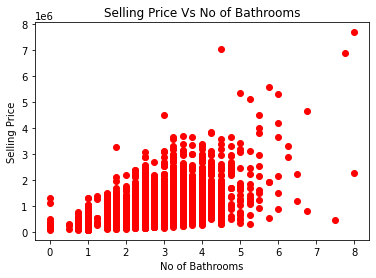

In [24]:
plt.scatter(x=raw_housing_data["No of Bathrooms"],
           y=raw_housing_data["Sale Price"],
           color="Red")
plt.xlabel("No of Bathrooms")
plt.ylabel("Selling Price")
plt.title("Selling Price Vs No of Bathrooms")
plt.show()

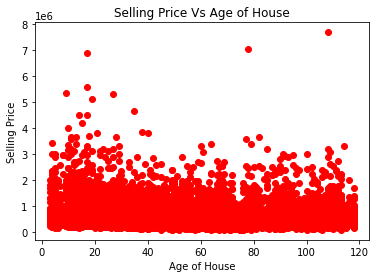

In [25]:
plt.scatter(x=raw_housing_data["Age of House (in Years)"],
           y=raw_housing_data["Sale Price"],
           color="red")
plt.xlabel("Age of House")
plt.ylabel("Selling Price")
plt.title("Selling Price Vs Age of House")
plt.show()

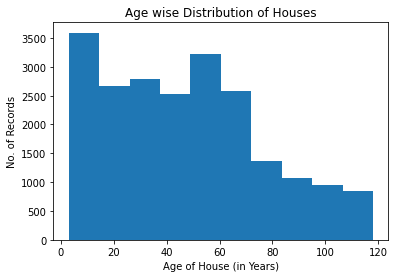

In [26]:
plt.hist(raw_housing_data["Age of House (in Years)"], bins=10)
plt.xlabel("Age of House (in Years)")
plt.ylabel("No. of Records")
plt.title("Age wise Distribution of Houses")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe13efb4d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe13efc2400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe13efb49a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe13efc2ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe13efc2e20>],
 'means': []}

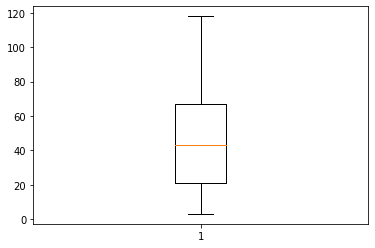

In [27]:
plt.boxplot(raw_housing_data["Age of House (in Years)"])

In [29]:
zip_condition_sale=raw_housing_data.groupby(["Condition of the House", "Zipcode"])["Sale Price"].mean()
zip_condition_sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [30]:
#IMPORTANT
zipcode_condition_sale3=pd.pivot_table(raw_housing_data, index=["Zipcode"], columns=["Condition of the House"], values=["Sale Price"], aggfunc=np.mean)
zipcode_condition_sale3

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [31]:
#To find out the plot length from plot area
raw_housing_data["Plot length"] = raw_housing_data["Flat Area (in Sqft)"]**0.5
raw_housing_data["Plot length"].head()


0    34.351128
1    50.695167
2    27.748874
3    44.271887
4    40.987803
Name: Plot length, dtype: float64

In [32]:
#Calculating total area of the house
raw_housing_data["total_area"] = raw_housing_data["Flat Area (in Sqft)"] + raw_housing_data["Lot Area (in Sqft)"]
raw_housing_data["total_area"].head()

0     6830.0
1     9812.0
2    10770.0
3     6960.0
4     9760.0
Name: total_area, dtype: float64

In [33]:

#Imp. 
#Map function is several times more efficient when compared to the brute force & It helps in reducing the size of the code
#raw_housing_data['Condition of the House'] = raw_housing_data['Condition of the House'].map({'Good':'1', 'Excellent':'3', 'Bad':'0', 'Fair':'1', 'Okay':'0'})
#raw_housing_data['Condition of the House'].unique()

In [34]:
raw_housing_data["Date House was Sold"].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [35]:
time=pd.DatetimeIndex(raw_housing_data["Date House was Sold"])
raw_housing_data["year_sold"]=time.year
raw_housing_data["month_sold"]=time.month
#raw_housing_data["weekday_sold"]=time.day_name()     #Just commenting for simplicity only
raw_housing_data["date_sold"]=time.days_in_month
#data["year_sold", "month_sold", "weekday_sold", "date_sold"].head()

In [36]:
raw_housing_data["year_sold"].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: int64

In [38]:
raw_housing_data["month_sold"].head()

0    10
1    12
2     2
3    12
4     2
Name: month_sold, dtype: int64

In [39]:
#raw_housing_data["weekday_sold"].head()    #just commenting for simplicity only

In [40]:
raw_housing_data["date_sold"].head()

0    31
1    31
2    29
3    31
4    29
Name: date_sold, dtype: int64

In [41]:
"""
def luxury_home(row):
    count=0
    if row[0]=="Yes":    #Waterfront View
        count=count+1
    if row[1] in ["Good", "Excellent"]:    #Condition of the House
        count=count+1
    if row[2]>=8:    #Overall grade
        count=count+1
    if count>=2:
        return "Yes"
    else:
        return "No"
    
raw_housing_data["Luxury_name"]=raw_housing_data[["Waterfront View", "Condition of the House", "Overall Grade"]].apply(luxury_home, axis=1)
raw_housing_data["Luxury_name"].unique()

#Pandas.apply() function: takes only few Sec.
"""

'\ndef luxury_home(row):\n    count=0\n    if row[0]=="Yes":    #Waterfront View\n        count=count+1\n    if row[1] in ["Good", "Excellent"]:    #Condition of the House\n        count=count+1\n    if row[2]>=8:    #Overall grade\n        count=count+1\n    if count>=2:\n        return "Yes"\n    else:\n        return "No"\n    \nraw_housing_data["Luxury_name"]=raw_housing_data[["Waterfront View", "Condition of the House", "Overall Grade"]].apply(luxury_home, axis=1)\nraw_housing_data["Luxury_name"].unique()\n\n#Pandas.apply() function: takes only few Sec.\n'

In [42]:
"""Important Part"""

'Important Part'

In [43]:
raw_housing_data["Sale Price"].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [44]:
raw_housing_data["Sale Price"].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

In [45]:
raw_housing_data["Sale Price"]

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Sale Price, Length: 21613, dtype: float64

In [46]:
raw_housing_data["Sale Price"].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

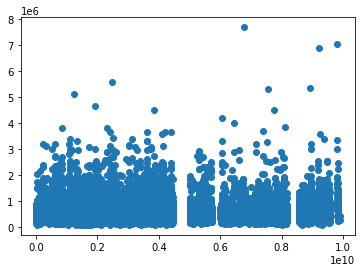

In [47]:
import matplotlib.pyplot as plt
plt.scatter(x=raw_housing_data["ID"],
           y=raw_housing_data["Sale Price"])

<AxesSubplot:xlabel='Sale Price'>

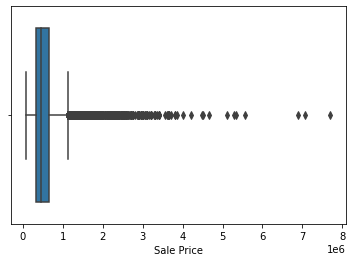

In [48]:
import seaborn as sns
sns.boxplot(x=raw_housing_data["Sale Price"])

In [49]:
q1=raw_housing_data["Sale Price"].quantile(0.25)
q3=raw_housing_data["Sale Price"].quantile(0.75)
iqr=q3-q1
iqr

323050.0

In [51]:
upper_limit=q3+1.5*iqr    #from mathematical equation for Outlier
lower_limit=q1-1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [52]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else: 
        return value
    
#For treating outliers
raw_housing_data["Sale Price"] = raw_housing_data["Sale Price"].apply(limit_imputer)

In [53]:
#To check wheather, we actually treated the outlier or not
raw_housing_data["Sale Price"].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [54]:
"""Now We can see the difference between the value of data of Original Sale price and after treating outliers """

'Now We can see the difference between the value of data of Original Sale price and after treating outliers '

<AxesSubplot:xlabel='Sale Price'>

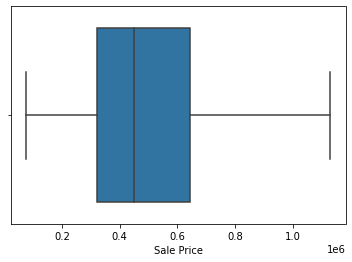

In [55]:
import seaborn as sns
sns.boxplot(x=raw_housing_data["Sale Price"])

In [56]:
raw_housing_data.info()    #To find how many missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [57]:
raw_housing_data.dropna(inplace=True, axis=0, subset=["Sale Price"])

In [58]:
#For verification
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

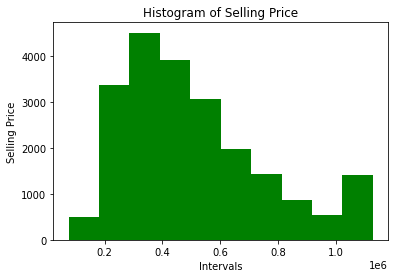

In [59]:
#To check how the values are dustributed over the range?
plt.hist(raw_housing_data["Sale Price"], bins=10, color="green")
plt.xlabel("Intervals")
plt.ylabel("Selling Price")
plt.title("Histogram of Selling Price")
plt.show()

In [60]:
len(raw_housing_data["Latitude"].unique())

5034

In [61]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [62]:
raw_housing_data["Zipcode"].isnull().any()

True

In [63]:
numerical_columns=["No of Bathrooms", "Flat Area (in Sqft)", "Lot Area (in Sqft)",
                   "Area of the House from Basement (in Sqft)", "Latitude", "Longitude",
                  "Living Area after Renovation (in Sqft)"]


In [64]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy="median")
raw_housing_data[numerical_columns]=imputer.fit_transform(raw_housing_data[numerical_columns])

In [65]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [66]:
column=raw_housing_data["Zipcode"].values.reshape(-1, 1)
imputer=SimpleImputer(missing_values=np.nan, strategy="most_frequent")
raw_housing_data["Zipcode"]=imputer.fit_transform(column)
#raw_housing_data["Zipcode"].shape
#column.shape
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [67]:
raw_housing_data["Zipcode"].isnull().any()

False

In [68]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [69]:
#As It's hard to find any numeric relationship beween zipcode and sale price, So, converted to object data type
raw_housing_data["Zipcode"]=raw_housing_data["Zipcode"].astype(object)

In [70]:
raw_housing_data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [71]:
raw_housing_data["No of Times Visited"].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [72]:
mapping={"None":"0",
        "Once":"1",
        "Twice":"2",
        "Thrice":"3",
        "Four":"4"}
raw_housing_data["No of Times Visited"]=raw_housing_data["No of Times Visited"].map(mapping)
raw_housing_data["No of Times Visited"].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [74]:
raw_housing_data["Ever Renovated"]=np.where(raw_housing_data["Renovated Year"]==0, "No", "Yes")

In [75]:
raw_housing_data["Purchase Year"] = pd.DatetimeIndex(raw_housing_data["Date House was Sold"]).year

In [76]:
#Year since renovation=year of sale - year of renovation
raw_housing_data["Years Since Renovation"]=np.where (raw_housing_data["Ever Renovated"]=="Yes", abs(raw_housing_data["Purchase Year"]-raw_housing_data["Renovated Year"]), 0)
raw_housing_data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Plot length,total_area,year_sold,month_sold,date_sold,Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1340.0,5650,34.351128,6830.0,2017,10,31,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,1690.0,7639,50.695167,9812.0,2017,12,31,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,2720.0,8062,27.748874,10770.0,2016,2,29,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1360.0,5000,44.271887,6960.0,2017,12,31,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1800.0,7503,40.987803,9760.0,2016,2,29,No,2016,0


In [77]:
raw_housing_data.drop(columns=["Purchase Year", "Date House was Sold", "Renovated Year"], inplace=True)

In [78]:
raw_housing_data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Plot length,total_area,year_sold,month_sold,date_sold,Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,-122.257,1340.0,5650,34.351128,6830.0,2017,10,31,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,-122.319,1690.0,7639,50.695167,9812.0,2017,12,31,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,-122.233,2720.0,8062,27.748874,10770.0,2016,2,29,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,-122.393,1360.0,5000,44.271887,6960.0,2017,12,31,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,-122.045,1800.0,7503,40.987803,9760.0,2016,2,29,No,0


In [79]:
raw_housing_data.to_csv("transformed_housing_data.csv", index=False)

In [80]:
#Correlation
import pandas as pd
transformed_housing_data=pd.read_csv("/home/deepak/ml/transformed_housing_data.csv")
transformed_housing_data["Sale Price"].corr(transformed_housing_data["Flat Area (in Sqft)"])

0.6951704258420669

In [81]:
np.corrcoef(transformed_housing_data["Sale Price"], transformed_housing_data["Flat Area (in Sqft)"])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [82]:
transformed_housing_data

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Plot length,total_area,year_sold,month_sold,date_sold,Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,-122.257,1340.0,5650,34.351128,6830.0,2017,10,31,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,-122.319,1690.0,7639,50.695167,9812.0,2017,12,31,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,-122.233,2720.0,8062,27.748874,10770.0,2016,2,29,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,-122.393,1360.0,5000,44.271887,6960.0,2017,12,31,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,-122.045,1800.0,7503,40.987803,9760.0,2016,2,29,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,...,-122.346,1530.0,1509,39.115214,2661.0,2017,5,31,No,0
21605,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,...,-122.362,1830.0,7200,48.062459,8123.0,2016,2,29,No,0
21606,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,...,-122.299,1020.0,2007,31.937439,2370.0,2017,6,30,No,0
21607,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,...,-122.069,1410.0,1287,40.000000,3988.0,2016,1,31,No,0


In [83]:
transformed_housing_data.drop(columns=["ID"])

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Plot length,total_area,year_sold,month_sold,date_sold,Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,...,-122.257,1340.0,5650,34.351128,6830.0,2017,10,31,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,...,-122.319,1690.0,7639,50.695167,9812.0,2017,12,31,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,...,-122.233,2720.0,8062,27.748874,10770.0,2016,2,29,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,...,-122.393,1360.0,5000,44.271887,6960.0,2017,12,31,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,...,-122.045,1800.0,7503,40.987803,9760.0,2016,2,29,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,8,...,-122.346,1530.0,1509,39.115214,2661.0,2017,5,31,No,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,8,...,-122.362,1830.0,7200,48.062459,8123.0,2016,2,29,No,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,7,...,-122.299,1020.0,2007,31.937439,2370.0,2017,6,30,No,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,8,...,-122.069,1410.0,1287,40.000000,3988.0,2016,1,31,No,0


In [84]:
transformed_housing_data["Flat Area (in Sqft)"].corr(transformed_housing_data["Sale Price"])

0.6951704258420669

In [85]:
transformed_housing_data.drop(["ID"], axis=1).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Plot length,total_area,year_sold,month_sold,date_sold,Years Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,...,0.402430,0.045401,0.629944,0.092325,0.690305,0.116264,-0.003395,-0.013926,0.006883,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,...,-0.008708,0.129569,0.391771,0.029264,0.605736,0.044191,0.009924,-0.001471,0.004467,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,...,0.024570,0.223171,0.568568,0.087226,0.765957,0.104045,0.026435,0.007199,0.006993,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,...,0.052538,0.240091,0.756185,0.183223,0.987744,0.194176,0.029064,0.011861,0.012457,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,...,-0.085719,0.229449,0.144507,0.718527,0.162305,0.999764,-0.005548,-0.002413,0.012111,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,...,0.049692,0.125620,0.280106,-0.011204,0.365623,0.002656,0.022572,0.014262,0.003140,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,...,0.006162,-0.078453,0.280452,0.072561,0.268351,0.080667,-0.001385,-0.005685,-0.003674,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,...,0.111226,0.201736,0.681362,0.107581,0.724200,0.117451,0.030950,0.007624,0.011918,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,...,-0.000819,0.343793,0.731996,0.194106,0.864033,0.202087,0.023752,0.009930,0.011710,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,...,0.110451,-0.144822,0.200302,0.017263,0.433067,0.024819,0.015567,0.005956,0.003910,0.029158


In [86]:
transformed_housing_data.drop(columns="ID", inplace=True)

In [87]:
transformed_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [88]:
transformed_housing_data["Condition of the House"].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [89]:
transformed_housing_data["Condition of the House"].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

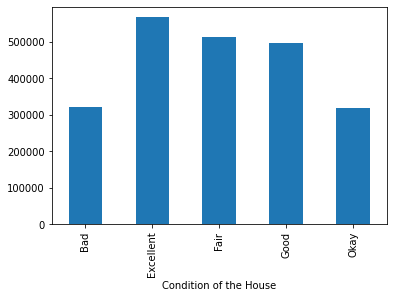

In [90]:
transformed_housing_data.groupby("Condition of the House", )["Sale Price"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Condition of the House'>

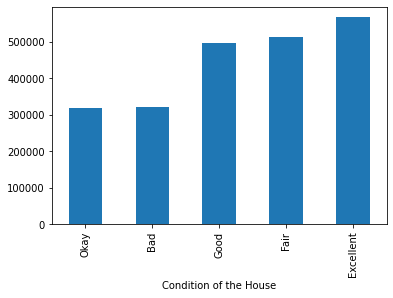

In [91]:
transformed_housing_data.groupby("Condition of the House", )["Sale Price"].mean().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='Waterfront View'>

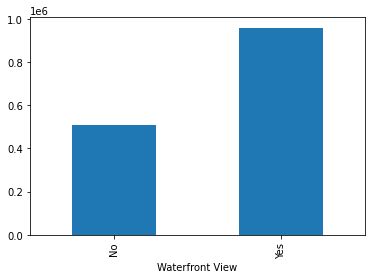

In [92]:
transformed_housing_data.groupby("Waterfront View", )["Sale Price"].mean().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='Ever Renovated'>

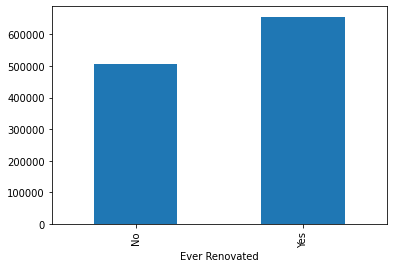

In [93]:
transformed_housing_data.groupby("Ever Renovated", )["Sale Price"].mean().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='Zipcode'>

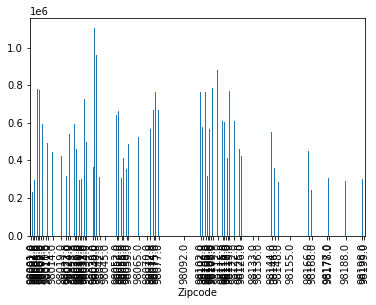

In [94]:
transformed_housing_data.groupby("Zipcode", )["Sale Price"].mean().sort_values().plot(kind="bar")

In [95]:
#just removing blanks
transformed_housing_data=transformed_housing_data.rename(columns={"Sale Price":"sale_price"})
transformed_housing_data=transformed_housing_data.rename(columns={"Condition of the House":"condition_of_the_house"})
transformed_housing_data=transformed_housing_data.rename(columns={"Ever Renovated": "ever_renovated"})
transformed_housing_data.head()

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,condition_of_the_house,Overall Grade,...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Plot length,total_area,year_sold,month_sold,date_sold,ever_renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,...,-122.257,1340.0,5650,34.351128,6830.0,2017,10,31,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,...,-122.319,1690.0,7639,50.695167,9812.0,2017,12,31,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,...,-122.233,2720.0,8062,27.748874,10770.0,2016,2,29,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,...,-122.393,1360.0,5000,44.271887,6960.0,2017,12,31,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,...,-122.045,1800.0,7503,40.987803,9760.0,2016,2,29,No,0


In [96]:
#creating dummy variables
transformed_housing_data=pd.get_dummies(transformed_housing_data, columns=["condition_of_the_house"], drop_first=True)
transformed_housing_data.head()

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,total_area,year_sold,month_sold,date_sold,ever_renovated,Years Since Renovation,condition_of_the_house_Excellent,condition_of_the_house_Fair,condition_of_the_house_Good,condition_of_the_house_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,1180.0,...,6830.0,2017,10,31,No,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,2170.0,...,9812.0,2017,12,31,Yes,26,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,770.0,...,10770.0,2016,2,29,No,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,1050.0,...,6960.0,2017,12,31,No,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,1680.0,...,9760.0,2016,2,29,No,0,0,1,0,0


In [97]:
transformed_housing_data=transformed_housing_data.rename(columns={"Waterfront View": "waterfront_view"})
transformed_housing_data=pd.get_dummies(transformed_housing_data, columns=["ever_renovated", "waterfront_view"], drop_first=True)
transformed_housing_data.head()

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,year_sold,month_sold,date_sold,Years Since Renovation,condition_of_the_house_Excellent,condition_of_the_house_Fair,condition_of_the_house_Good,condition_of_the_house_Okay,ever_renovated_Yes,waterfront_view_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,2017,10,31,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,2017,12,31,26,0,1,0,0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2016,2,29,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,2017,12,31,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,2016,2,29,0,0,1,0,0,0,0


In [98]:
transformed_housing_data

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,year_sold,month_sold,date_sold,Years Since Renovation,condition_of_the_house_Excellent,condition_of_the_house_Fair,condition_of_the_house_Good,condition_of_the_house_Okay,ever_renovated_Yes,waterfront_view_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,2017,10,31,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,2017,12,31,26,0,1,0,0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2016,2,29,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,2017,12,31,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,2016,2,29,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,2017,5,31,0,0,1,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,2016,2,29,0,0,1,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,2017,6,30,0,0,1,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,2016,1,31,0,0,1,0,0,0,0


In [99]:
zip_table=transformed_housing_data.groupby("Zipcode").agg({"sale_price":"mean"}).sort_values("sale_price", ascending=True)

In [100]:
zip_table.head(10)

,sale_price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491
98023.0,286486.572289
98188.0,289078.345588
98003.0,294111.278571
98030.0,296187.980469


In [101]:
#Now Categorizing
zip_table["zipcode_group"]=pd.cut(zip_table["sale_price"], bins=10, labels=["zipcode_group_0",
                                                                           "zipcode_group_1",
                                                                           "zipcode_group_2",
                                                                           "zipcode_group_3",
                                                                           "zipcode_group_4",
                                                                           "zipcode_group_5",
                                                                           "zipcode_group_6",
                                                                           "zipcode_group_7",
                                                                           "zipcode_group_8",
                                                                           "zipcode_group_9"],
                                                                           include_lowest=True)
zip_table=zip_table.drop(columns="sale_price")

In [102]:
zip_table

,zipcode_group
Zipcode,
98002.0,zipcode_group_0
98168.0,zipcode_group_0
98032.0,zipcode_group_0
98001.0,zipcode_group_0
98148.0,zipcode_group_0
...,...
98109.0,zipcode_group_6
98112.0,zipcode_group_7
98040.0,zipcode_group_8


In [103]:
transformed_housing_data=pd.merge(transformed_housing_data, zip_table, left_on="Zipcode",
                                 how="left", right_index=True)

In [104]:
transformed_housing_data

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,month_sold,date_sold,Years Since Renovation,condition_of_the_house_Excellent,condition_of_the_house_Fair,condition_of_the_house_Good,condition_of_the_house_Okay,ever_renovated_Yes,waterfront_view_Yes,zipcode_group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,10,31,0,0,1,0,0,0,0,zipcode_group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,12,31,26,0,1,0,0,1,0,zipcode_group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2,29,0,0,1,0,0,0,0,zipcode_group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,12,31,0,1,0,0,0,0,0,zipcode_group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,2,29,0,0,1,0,0,0,0,zipcode_group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,5,31,0,0,1,0,0,0,0,zipcode_group_3
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,2,29,0,0,1,0,0,0,0,zipcode_group_1
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,6,30,0,0,1,0,0,0,0,zipcode_group_3
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,1,31,0,0,1,0,0,0,0,zipcode_group_4


In [105]:
transformed_housing_data=transformed_housing_data.drop(columns="Zipcode")
transformed_housing_data.head()

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,month_sold,date_sold,Years Since Renovation,condition_of_the_house_Excellent,condition_of_the_house_Fair,condition_of_the_house_Good,condition_of_the_house_Okay,ever_renovated_Yes,waterfront_view_Yes,zipcode_group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,10,31,0,0,1,0,0,0,0,zipcode_group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,12,31,26,0,1,0,0,1,0,zipcode_group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2,29,0,0,1,0,0,0,0,zipcode_group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,12,31,0,1,0,0,0,0,0,zipcode_group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,2,29,0,0,1,0,0,0,0,zipcode_group_4


In [106]:
transformed_housing_data=pd.get_dummies(transformed_housing_data, columns=["zipcode_group"], drop_first=True)

In [107]:
transformed_housing_data.to_csv("transformed_housing_data1.csv", index=False)

In [108]:
transformed_housing_data1=pd.read_csv("transformed_housing_data1.csv")

In [109]:
transformed_housing_data1.head()

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,waterfront_view_Yes,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [110]:
Y=transformed_housing_data1.iloc[:, 0]
X=transformed_housing_data1.iloc[:, 1:31]
X.head(5)

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,condition_of_the_house_Excellent,condition_of_the_house_Fair,condition_of_the_house_Good,condition_of_the_house_Okay,ever_renovated_Yes,waterfront_view_Yes,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,1,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,0,1,0,0,1,0,0,1,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,1,0,0,0,0,0,1,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,1,0,0,0,0,0,0,0,1,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,1,0,0,0,0,0,0,0,1


In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [112]:
#shape function is used to find out the dimension of a table
x_train.shape

(15126, 30)

In [113]:
x_test.shape

(6483, 30)

In [114]:
y_train.shape

(15126,)

In [115]:
y_test.shape

(6483,)

In [116]:
X.describe()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,condition_of_the_house_Excellent,condition_of_the_house_Fair,condition_of_the_house_Good,condition_of_the_house_Okay,ever_renovated_Yes,waterfront_view_Yes,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4
count,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,...,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,0.234347,7.623490,1788.319589,291.513490,46.999722,...,0.078717,0.649174,0.262761,0.007960,0.042297,0.007543,0.109399,0.188625,0.149706,0.186681
std,0.929916,0.770097,918.347816,4.142353e+04,0.539909,0.766382,1.105519,827.977604,442.570991,29.373317,...,0.269303,0.477240,0.440144,0.088863,0.201271,0.086525,0.312146,0.391220,0.356791,0.389665
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,43.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,67.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,10.000000,9410.000000,4820.000000,118.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
Y.describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: sale_price, dtype: float64

In [118]:
#Standardisation
from sklearn import preprocessing
scale=preprocessing.StandardScaler()

x_train=scale.fit_transform(x_train)
x_train

array([[ 1.72251247,  1.14263416,  0.68871726, ...,  2.07766599,
        -0.41682248, -0.48110094],
       [-0.40258223, -0.47676134, -0.84813395, ..., -0.48130932,
        -0.41682248, -0.48110094],
       [-0.40258223,  2.11427147,  1.15410178, ..., -0.48130932,
        -0.41682248, -0.48110094],
       ...,
       [-1.46512958, -0.80064044, -1.04294607, ..., -0.48130932,
        -0.41682248, -0.48110094],
       [-0.40258223, -1.44839865, -0.89142553, ...,  2.07766599,
        -0.41682248, -0.48110094],
       [ 0.65996512,  0.49487596,  0.0501664 , ..., -0.48130932,
        -0.41682248, -0.48110094]])

In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No of Bedrooms                             21609 non-null  int64  
 1   No of Bathrooms                            21609 non-null  float64
 2   Flat Area (in Sqft)                        21609 non-null  float64
 3   Lot Area (in Sqft)                         21609 non-null  float64
 4   No of Floors                               21609 non-null  float64
 5   No of Times Visited                        21609 non-null  int64  
 6   Overall Grade                              21609 non-null  int64  
 7   Area of the House from Basement (in Sqft)  21609 non-null  float64
 8   Basement Area (in Sqft)                    21609 non-null  int64  
 9   Age of House (in Years)                    21609 non-null  int64  
 10  Latitude              

In [120]:
#Scaling the feature of testdataset: StandardScaler
x_test=scale.fit_transform(x_test)
x_test

array([[ 0.71790723,  0.51319208,  0.1314256 , ...,  2.06553868,
        -0.42605159, -0.4744014 ],
       [-0.38970642, -1.44560936, -0.49843079, ..., -0.48413521,
         2.3471336 , -0.4744014 ],
       [ 0.71790723,  1.16612589,  0.46292896, ..., -0.48413521,
        -0.42605159, -0.4744014 ],
       ...,
       [ 1.82552088,  0.51319208, -0.18902765, ..., -0.48413521,
         2.3471336 , -0.4744014 ],
       [ 0.71790723,  0.51319208,  0.38557818, ...,  2.06553868,
        -0.42605159, -0.4744014 ],
       [ 0.71790723, -0.46620864,  0.19772627, ..., -0.48413521,
        -0.42605159, -0.4744014 ]])

In [121]:
#Linear Regression
"""Building first predictive model with mean Prediction"""

'Building first predictive model with mean Prediction'

In [122]:
#Simplest prediction model
transformed_housing_data1["mean_sales"]=transformed_housing_data1["sale_price"].mean()
transformed_housing_data1["mean_sales"].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

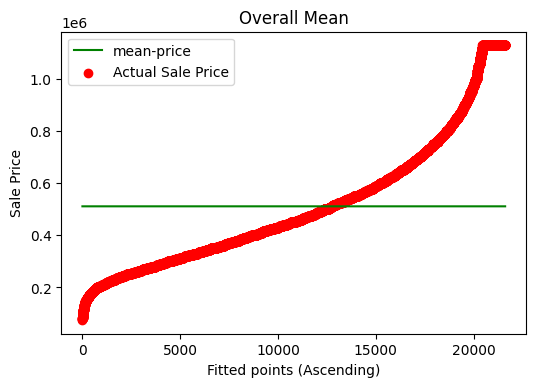

In [123]:
import matplotlib.pyplot as plt
plt.figure(dpi=100)
k=range(0, len(transformed_housing_data1))
plt.scatter(k, transformed_housing_data1["sale_price"].sort_values(), color="red", label="Actual Sale Price")
plt.plot(k, transformed_housing_data1["mean_sales"].sort_values(), color="green", label="mean-price")
plt.xlabel("Fitted points (Ascending)")
plt.ylabel("Sale Price")
plt.title("Overall Mean")
plt.legend()

In [124]:
import numpy as np
#Improving Upon the mean Regression Model
grades_mean=transformed_housing_data1.pivot_table(values="sale_price", columns="Overall Grade", aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
sale_price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [125]:
#making new column
transformed_housing_data1["grade_mean"]=0
#for every grade fill its mean price in new column
for i in grades_mean.columns:
    transformed_housing_data1["grade_mean"][transformed_housing_data1["Overall Grade"] == i] = grades_mean[i][0]

transformed_housing_data1["grade_mean"].head()

<ipython-input-125-9a5dec17d715>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_housing_data1["grade_mean"][transformed_housing_data1["Overall Grade"] == i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [126]:
gradewise_list=[]
for i in range(1, 11):
    k=transformed_housing_data1["sale_price"][transformed_housing_data1["Overall Grade"]==i]
    gradewise_list.append(k)

In [127]:
classwise_list=[]
for i in range(1, 11):
    k=transformed_housing_data1["sale_price"][transformed_housing_data1["Overall Grade"]==i]
    classwise_list.append(k)

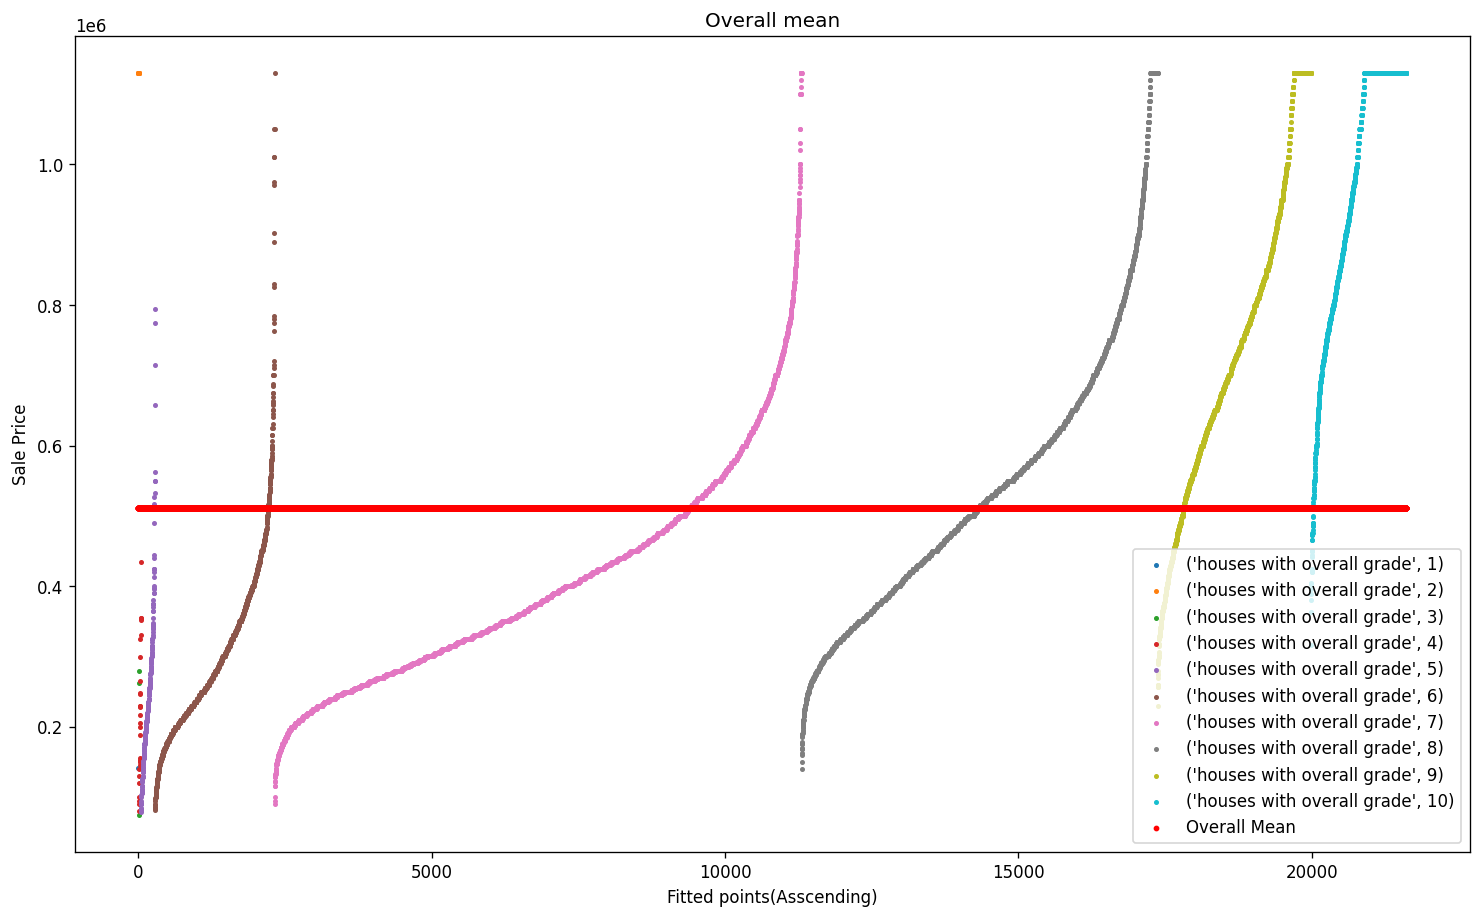

In [128]:
plt.figure(dpi=120, figsize=(15, 9))
#plotting "sale_price" gradewise
#z variable is for x-axis
z=0
for i in range(1, 11):
    #defining x-axis using z
    points=[k for k in range(z, z+len(classwise_list[i-1]))]
    #plotting
    plt.scatter(points, classwise_list[i-1].sort_values(), label=("houses with overall grade", i), s=4)
    
    #ploting grade wise mean
    #plt.scatter(points[classwise_list[i-1].mean() for q in range (len(classwise_list[i-1]))] s=6, color="pink")
    z=max(points)+1
#plotting Overall mean
plt.scatter([q for q in range(0, z)],transformed_housing_data1["mean_sales"], color="red", label="Overall Mean", s=6)
plt.xlabel("Fitted points(Asscending)")
plt.ylabel("Sale Price")
plt.title("Overall mean")
plt.legend(loc=4)

In [129]:
transformed_housing_data1

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9,mean_sales,grade_mean
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,511618.558147,402239.619779
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,0,0,0,0,0,0,511618.558147,402239.619779
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,1,0,0,0,0,0,0,0,511618.558147,301882.014720
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,1,0,0,0,0,0,0,511618.558147,537584.082097
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,0,0,0,0,0,0,0,511618.558147,537584.082097
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097


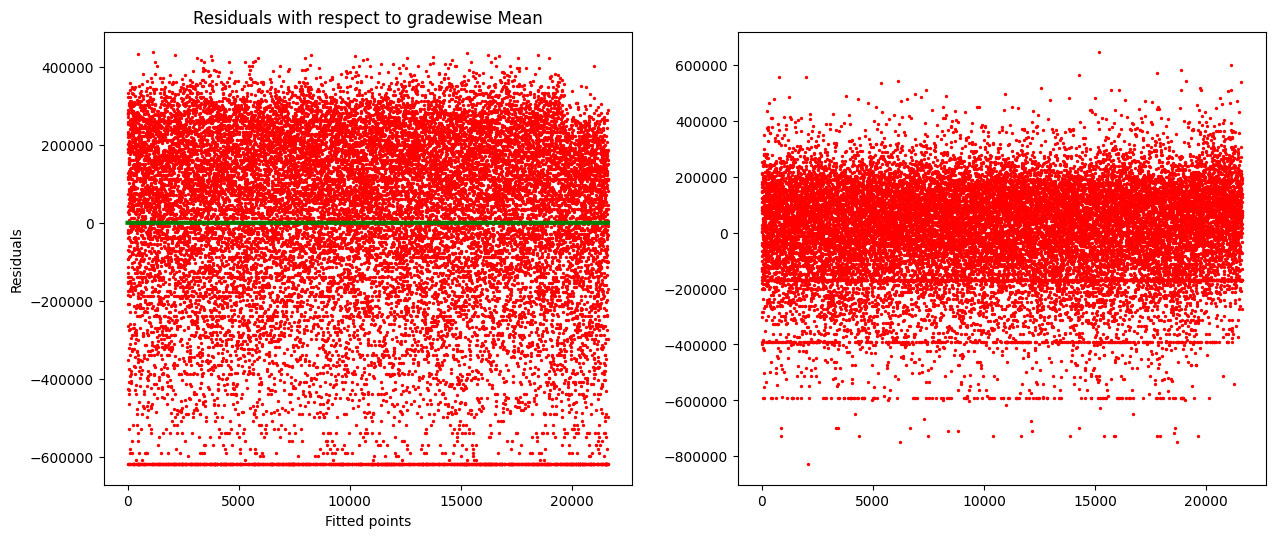

In [130]:
mean_difference = transformed_housing_data1["mean_sales"] - transformed_housing_data1["sale_price"]
grade_mean_difference=transformed_housing_data1["grade_mean"]-transformed_housing_data1["sale_price"]
k=range(0, len(transformed_housing_data1))

l=[0 for i in range(len(transformed_housing_data1))]

plt.figure(figsize=(15, 6), dpi=100)
plt.subplot(1, 2, 1)
plt.scatter(k, mean_difference, color="red", label="Residuals", s=2)
plt.plot(k, l, color="green", label="mean Regression", linewidth=3)
plt.xlabel("Fitted points")
plt.ylabel("Residuals")
plt.title("Residuals with respect to gradewise Mean")
plt.subplot(1, 2, 2)
plt.scatter(k, grade_mean_difference, color="red", label="Residuals", s=2)


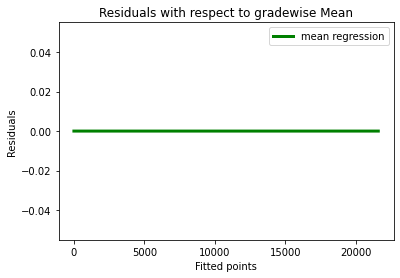

In [131]:
plt.plot(k,l, color="green", label="mean regression", linewidth=3)
plt.xlabel("Fitted points")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to gradewise Mean")
plt.legend()

In [132]:
cost=sum(mean_difference)/len(transformed_housing_data1)
print(round(cost, 7))

0.0


In [133]:
Y=transformed_housing_data1["sale_price"]
Y_hat1=transformed_housing_data1["mean_sales"]
Y_hat2=transformed_housing_data1["grade_mean"]
n=len(transformed_housing_data1)
len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [134]:
#for first Regression model
cost_mean=sum(abs(Y_hat1-Y))/n
cost_mean

199168.78146839526

In [135]:
#for Second regression model
cost_grade_mean=sum(abs(Y_hat2 - Y))/n
cost_grade_mean

137081.70298203363

In [139]:
#calculating the MAE using scikit-learn library
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(Y_hat2, Y)
cost_grade_mean

137081.7029820291

In [140]:
#Mean Square Error (MSE)
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1, Y)
cost_grade_mean=mean_squared_error(Y_hat2, Y)
cost_mean, cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [141]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1, Y)**0.5
cost_grade_mean=mean_squared_error(Y_hat2, Y)**0.5
cost_mean, cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [144]:
Y=transformed_housing_data1["sale_price"]
Y_bar=transformed_housing_data1["mean_sales"]
Y_hat=transformed_housing_data1["grade_mean"]
n=len(transformed_housing_data1)
len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [145]:
mse_mean=mean_squared_error(Y_bar, Y)
mse_mean

62528116847.799576

In [146]:
mse_model=mean_squared_error(Y_hat, Y)
mse_model

30804835720.342426

In [147]:
r2=1-(mse_model/mse_mean)
r2

0.5073442592981836

In [148]:
#import pandas as pd
#data=pd.read_csv("transformed_housing_data1.csv")
#transformed_housing_data1.head()
sale_price=transformed_housing_data1["sale_price"].head(30)
flat_area=transformed_housing_data1["Flat Area (in Sqft)"].head(30)
sample_data=pd.DataFrame({"sale_price":sale_price, "flat_area":flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


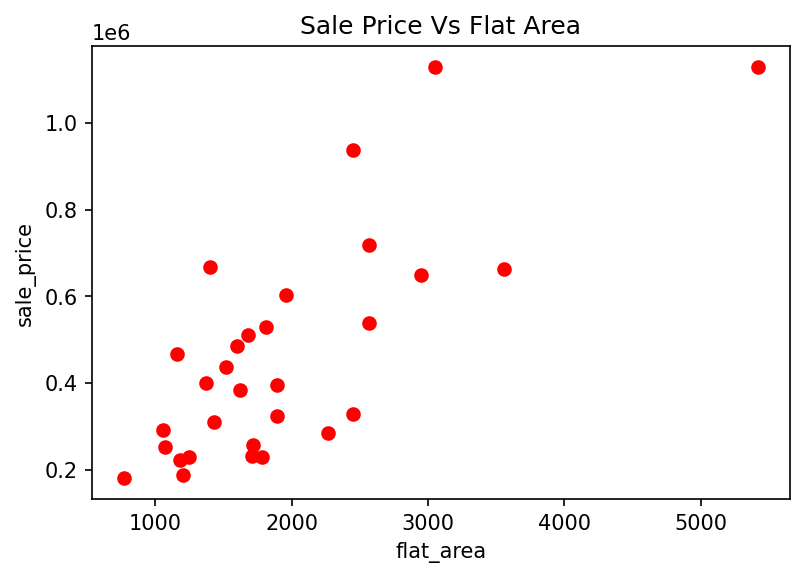

In [151]:
#For better understanding
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color="red")
plt.xlabel("flat_area")
plt.ylabel("sale_price")
plt.title("Sale Price Vs Flat Area")
#plt.legend()
plt.show()

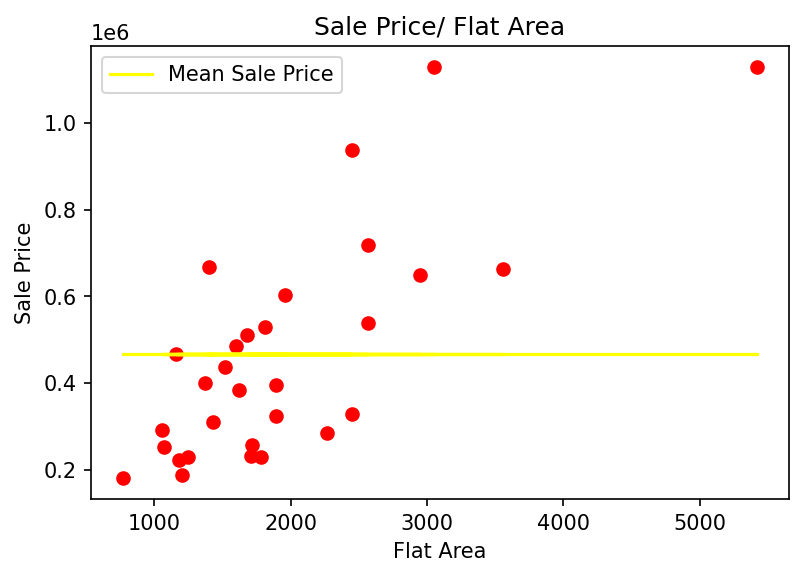

In [154]:
#Building the mean regression model to predict the sale price of the new house.
sample_data["mean_sale_price"]=sample_data.sale_price.mean()
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color="red")
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color="Yellow", label="Mean Sale Price")
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.title("Sale Price/ Flat Area")
plt.legend()
plt.show()

Text(0.5, 1.0, ' Slope 0 with MSE 281372081125.0')

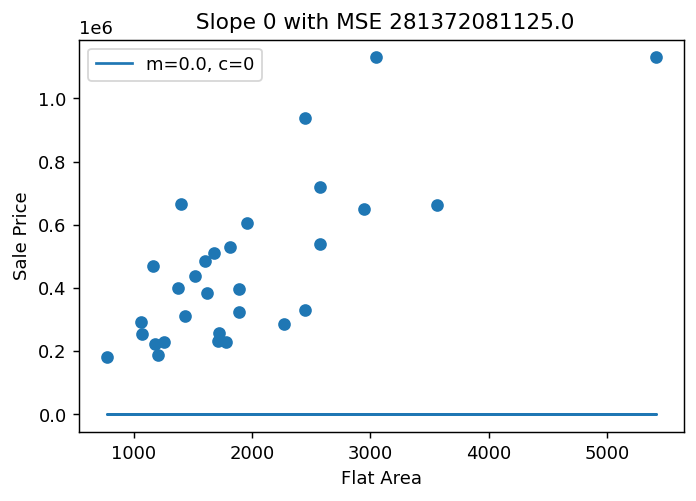

In [156]:
from sklearn.metrics import mean_squared_error as mse
c=0
m=0
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m + c)

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label="m=0.0, c=0")
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.legend()
MSE=mse(sample_data.sale_price, line)
plt.title(" Slope " +str(m) + " with MSE " + str(MSE))

In [157]:
#Lets automate, to find slope & intercept for a best fit line
def slope_error(slope, intercept, sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp=sample_data.flat_area[i]*slope+intercept
        sale.append(tmp)
    MSE=mse(sample_data.sale_price, sale)
    return MSE

slope=[i/10 for i in range(0, 5000)]
Cost=[]
for i in slope:
    cost=slope_error(slope=i, intercept=0, sample_data=sample_data)
    Cost.append(cost)

In [158]:
#Arranging in DataFrame
cost_table=pd.DataFrame({
    "slope":slope,
    "Cost":Cost
    
})
cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


Text(0, 0.5, 'Cost')

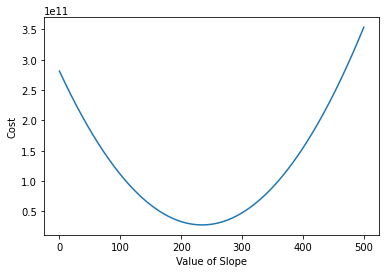

In [159]:
#Plotting the cost values corresponding to every value of Beta
plt.plot(cost_table.slope, cost_table.Cost, label="Cost Function Curve")
plt.xlabel("Value of Slope")
plt.ylabel("Cost")
#plt.legand()


In [160]:
"""
def intercept_error(slope, intercept, sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp=sample_data.flat_area[i]*slope + intercept
        sale.append(tmp)
    MSE=mse(sample_data.sale_price, sale)
    return MSE

intercept=[i for i in range(5000, 50000)]
Cost=[]
for i in intercept:
    cost=intercept_error(slope=234, intercept=i, sample_data=sample_data)
    Cost.append(cost)
    
#Plotting the cost values corresponding to every value of Beta
plt.plot(cost_table.intercept, cost_table.Cost, label="Cost function Curve")
plt.xlabel("Value of Intercept")
plt.ylabel("Cost")
plt.legend()
"""

'\ndef intercept_error(slope, intercept, sample_data):\n    sale=[]\n    for i in range(len(sample_data.flat_area)):\n        tmp=sample_data.flat_area[i]*slope + intercept\n        sale.append(tmp)\n    MSE=mse(sample_data.sale_price, sale)\n    return MSE\n\nintercept=[i for i in range(5000, 50000)]\nCost=[]\nfor i in intercept:\n    cost=intercept_error(slope=234, intercept=i, sample_data=sample_data)\n    Cost.append(cost)\n    \n#Plotting the cost values corresponding to every value of Beta\nplt.plot(cost_table.intercept, cost_table.Cost, label="Cost function Curve")\nplt.xlabel("Value of Intercept")\nplt.ylabel("Cost")\nplt.legend()\n'

In [161]:
slope=[i/10 for i in range(0, 5000)]
Cost=[]
for i in slope:
    cost=slope_error(slope=i, intercept=10834, sample_data=sample_data)
    Cost.append(cost)
    
#Arranging in DataFrame
cost_table=pd.DataFrame({
    "slope":slope,
    "cost":Cost
})
cost_table.tail()

,slope,cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


In [162]:
"""
new_slope=cost_table["slope"][cost_table["cost"]==cost_table["cost"].min().values]
new_slope[0]
"""

'\nnew_slope=cost_table["slope"][cost_table["cost"]==cost_table["cost"].min().values]\nnew_slope[0]\n'

In [163]:
#Implementing Gradiend Descent in Python
#step1
import numpy as np
def param_init(Y):
    """Y=target variable return initalized values of m & c"""
    m=0.1
    c=Y.mean()
    return m, c

#step2
def generate_predictions(m, c, X):
    """x=independent variable
    return prediction generated by line with parameters m, c
    """
    prediction=[]
    for x in X:
        pred=(m*x)+c
        prediction.append(pred)
    return prediction

#step3
def compute_cost(prediction, Y):
    """
    return the mean_squred_error between prediction and Y
    """
    cost=np.sum(((prediction-Y)**2)/len(Y))
    return cost

#step4
def gradients(prediction, Y, X):
    """
    Return Gradients corresponding to m & c
    """
    n=len(Y)
    Gm=2/n*np.sum((prediction-Y)*X)
    Gc=2/n*np.sum((prediction-Y))
    return Gm, Gc

def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    """Update and Return the new values of m & c"""
    m_new=m_old-alpha*Gm_old
    c_new=c_old-alpha*Gc_old
    return m_new, c_new


In [164]:
def result(m, c, X, Y, cost, predictions, i):
    """
    Print and Plot the final result obtained from gradient descent
    """
    #if the Gradient Descent converged to the optium value before max-iter
    if i<max_iter-1:
        print("*** Gradient Descent has converged at iteration {} ***".format(i))
    else:
        print("*** Result ater", max_iter, "iteration is: ***")
    #Plotting the final result
    plt.figure(figsize=(14, 7), dpi=120)
    plt.scatter(X, Y, color="red", label="data points")
    label="Find regression line: m= {}; c= {} ".format(str(m), str(c))
    plt.plot(X, predictions, color="green", label=label)
    plt.xlabel("flat_area")
    plt.ylabel("sale_price")
    plt.title("find regression line")
    plt.legend()

After Iteration 0 :m=  0.11316346413633305 c= 1.1849780416165836e-16 ; cost=  0.85836535863667
After Iteration 20 :m=  0.3275595607435688 c= 1.240489192847842e-16 ; cost=  0.6182472245590185
After Iteration 40 :m=  0.4706921039517346 c= 1.3248661427193537e-16 ; cost=  0.5112264752046607
After Iteration 60 :m=  0.5662485308150865 c= 1.415904430738617e-16 ; cost=  0.46352728398628984
After Iteration 80 :m=  0.6300427631414932 c= 1.4951003398285442e-16 ; cost=  0.4422677351921283
After Iteration 100 :m=  0.6726323011945988 c= 1.611303683072644e-16 ; cost=  0.4327923457067555
After Iteration 120 :m=  0.7010654163122192 c= 1.666074685620818e-16 ; cost=  0.42856916078553225
After Iteration 140 :m=  0.7200475906265729 c= 1.6660746856208182e-16 ; cost=  0.4266868855601835
After Iteration 160 :m=  0.7327202415200801 c= 1.669405354694694e-16 ; cost=  0.42584795473189874
After Iteration 180 :m=  0.7411806042798547 c= 1.6694053546946945e-16 ; cost=  0.42547404292284524
After Iteration 200 :m=  0.7

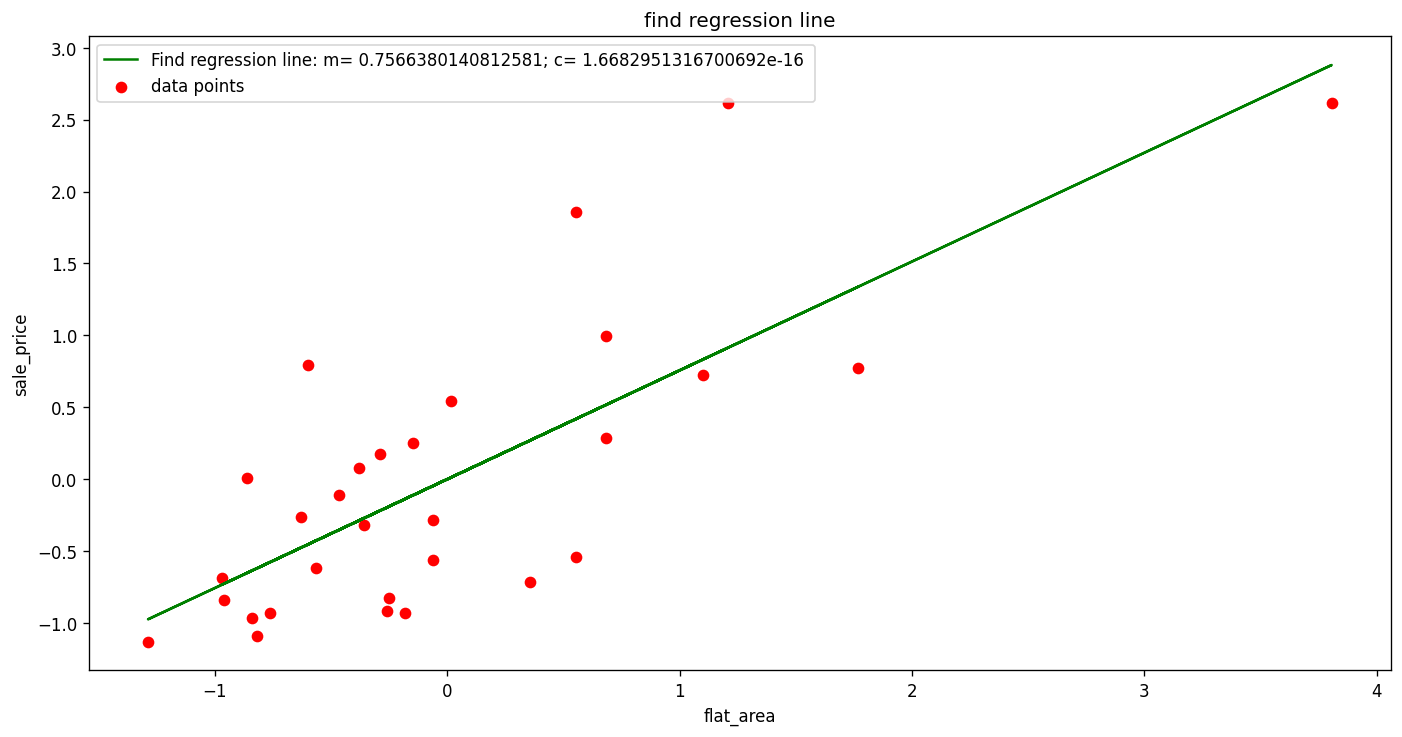

In [165]:
#Scaling the dataset using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sale_price=scaler.fit_transform(sample_data["sale_price"].values.reshape(-1, 1))
flat_area=scaler.fit_transform(sample_data["flat_area"].values.reshape(-1, 1))

"""
#defining and reshaping the dataset
sale_price=sample_data["sale_price"].values.reshape(-1, 1)
flat_area=sample_data["flat_area"].values.reshape(-1, 1)
"""


#declaring parameters
max_iter=1000
cost_old=0
alpha=0.01

#step1: initializing the values of m, c
m,c=param_init(sale_price)

#gradient Descent in action
for i in range(0, max_iter):
    #step2: generate predictions
    predictions=generate_predictions(m, c, flat_area)
    #step3: calculating cost
    cost_new = compute_cost(predictions, sale_price)
    #checking if GD converged
    if abs(cost_new-cost_old)<10**(-7):
        break
    #calculating gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    #step4: Updating parameters m and c
    m, c=param_update(m, c, Gm, Gc, alpha)
    #display result after every 20 iterations
    if i%20 == 0:
        print("After Iteration", i, ":m= ", m, "c=", c, "; cost= ", cost_new)
    #Updating cost_old
    cost_old=cost_new

#final result
result(m, c, flat_area, sale_price, cost_new, predictions, i)

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import warnings
warnings.filterwarnings(action="ignore")

In [213]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [185]:
#importing lib.
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

#data=pd.read_csv("transformed_housing_data1.csv")
transformed_housing_data1.head()

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9,mean_sales,grade_mean
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,511618.558147,402239.619779
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,0,0,0,0,0,0,511618.558147,402239.619779
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,1,0,0,0,0,0,0,0,511618.558147,301882.014720
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097


In [186]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=transformed_housing_data1["sale_price"]
X=scaler.fit_transform(transformed_housing_data1.drop(columns=["sale_price"]))
X=pd.DataFrame(data=X, columns=transformed_housing_data1.drop(columns=["sale_price"]).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9,mean_sales,grade_mean
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0,-0.614108
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0,-0.614108
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0,-1.177565
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0,-0.614108
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0,0.145783


In [187]:
#Checking and Removing Multicollinearity
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9,mean_sales,grade_mean
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694,NaN,0.336276
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871,NaN,0.638131
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253,NaN,0.751262
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671,NaN,0.120503
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868,NaN,0.449453
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923,NaN,0.251620
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638,NaN,0.955963
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398,NaN,0.753757
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775,NaN,0.148740
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492,NaN,-0.423689


In [188]:
#Pair of independent variable with correlation greater than 0.5
k=X.corr()
z=[[str(i), str(j)] for i in k.columns for j in k.columns if (k.loc[i, j]>abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Plot length'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['No of Bathrooms', 'Plot length'],
  ['No of Bathrooms', 'grade_mean'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'Plot length'],
  ['Flat Area (in Sqft)', 'grade_mean'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'total_area'],
  ['No of Floors', 'No of Bathrooms'],


In [190]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9,mean_sales,grade_mean
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694,NaN,0.336276
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871,NaN,0.638131
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253,NaN,0.751262
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671,NaN,0.120503
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868,NaN,0.449453
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923,NaN,0.251620
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638,NaN,0.955963
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398,NaN,0.753757
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775,NaN,0.148740
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492,NaN,-0.423689


In [192]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No of Bedrooms                             21609 non-null  float64
 1   No of Bathrooms                            21609 non-null  float64
 2   Flat Area (in Sqft)                        21609 non-null  float64
 3   Lot Area (in Sqft)                         21609 non-null  float64
 4   No of Floors                               21609 non-null  float64
 5   No of Times Visited                        21609 non-null  float64
 6   Overall Grade                              21609 non-null  float64
 7   Area of the House from Basement (in Sqft)  21609 non-null  float64
 8   Basement Area (in Sqft)                    21609 non-null  float64
 9   Age of House (in Years)                    21609 non-null  float64
 10  Latitude              

In [193]:
X.drop(columns=["Plot length", "total_area", "year_sold", "month_sold", "date_sold", "mean_sales", "grade_mean"], inplace=True)

In [196]:
#Calculating VIF
#Importing variance_inflation_factor function from the statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X

#Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
condition_of_the_house_Excellent               53.578111
condition_of_the_house_Fair                   166.129930
condition_of_the_house_Good    

In [198]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [199]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)
    
    if vif.max() > 5:
        print(vif[vif==vif.max()].index[0], "has been removed")
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present any more")
        return data
    

In [200]:
for i in range(7):
    vif_data=MC_remover(vif_data)
vif_data.head()

Flat Area (in Sqft) has been removed
condition_of_the_house_Fair has been removed
No multicollinearity present any more
No multicollinearity present any more
No multicollinearity present any more
No multicollinearity present any more
No multicollinearity present any more


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,waterfront_view_Yes,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [201]:
#Remaining columns
#Calculating VIF for remaining columns
VIF=pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

VIF, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 condition_of_the_house_Excellent             1.206487
 condition_of_the_house_Good                  1.251488
 condition_of_the_house_Okay                  1.025386
 ever_renovated_Yes                           2.955539
 waterfron

In [203]:
#Training the Model
#Train/Test Set
x=vif_data
y=transformed_housing_data1["sale_price"]


In [204]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

In [205]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train, y_train)


LinearRegression(normalize=True)

In [206]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603571,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [207]:
predictions=lr.predict(x_test)
lr.score(x_test, y_test)

0.8461987715586199

In [208]:
#Residuals
residuals=predictions-y_test

residual_table=pd.DataFrame({"residuals":residuals, 
                            "predictions": predictions})
residual_table=residual_table.sort_values(by="predictions")

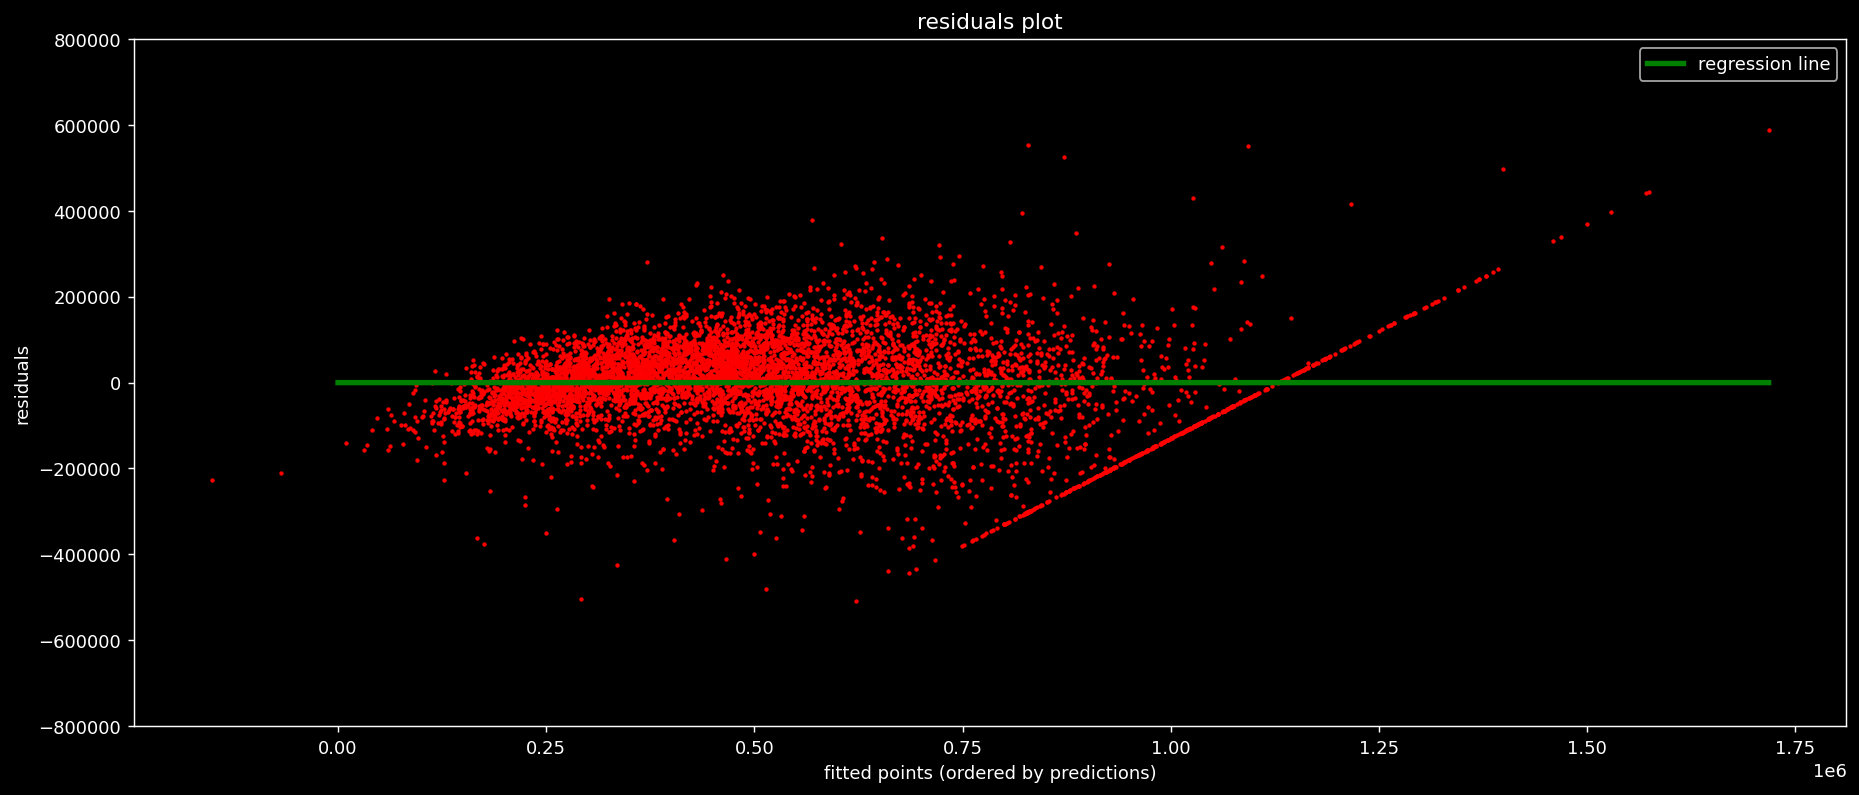

In [209]:
z=[i for i in range(int(residual_table["predictions"].max()))]
k=[0 for i in range(int(residual_table["predictions"].max()))]

plt.figure(dpi=130, figsize=(17, 7))
plt.scatter(residual_table["predictions"], residual_table["residuals"], color="red", s=2)
plt.plot(z, k, color="green", linewidth=3, label="regression line")
plt.ylim(-800000, 800000)
plt.xlabel("fitted points (ordered by predictions)")
plt.ylabel("residuals")
plt.title("residuals plot")
plt.legend()
plt.show()

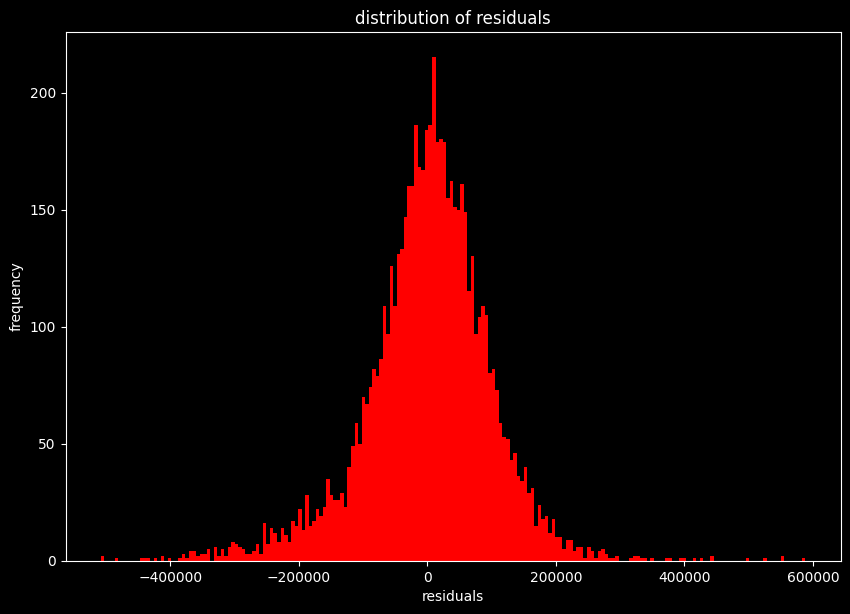

In [210]:
#2. Distribution of errors terms
plt.figure(dpi=100, figsize=(10, 7))
plt.hist(residual_table["residuals"], color="red", bins=200)
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.title("distribution of residuals")
plt.show()

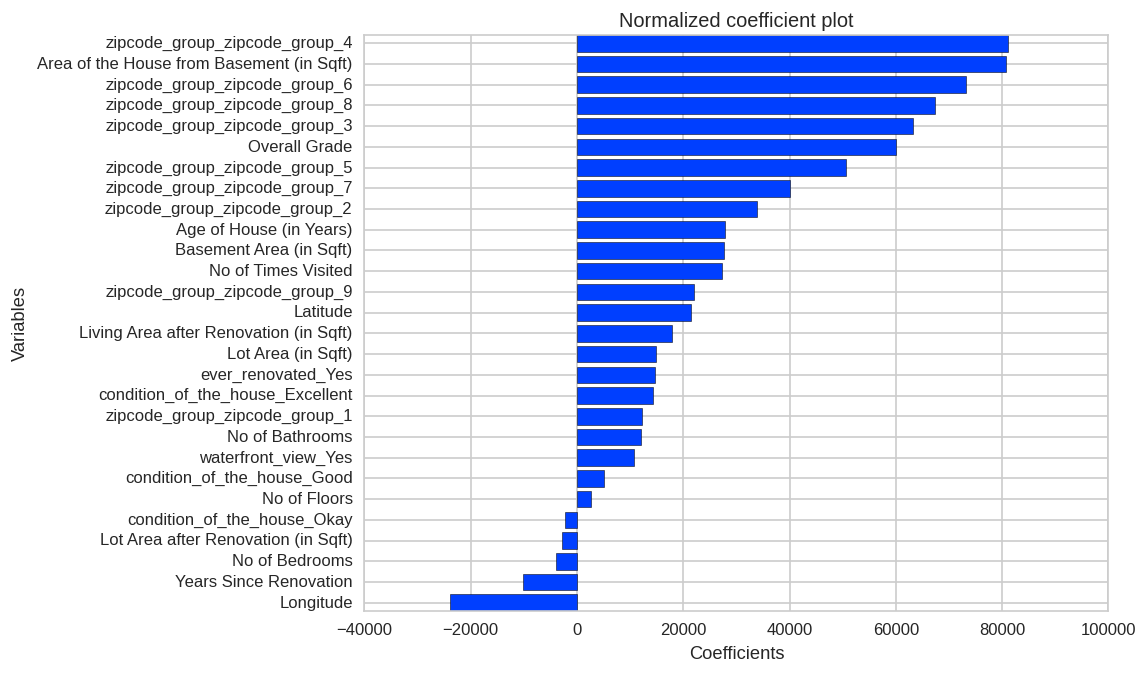

In [239]:
#Interpreting the result
#Model coefficients
coefficients_table=pd.DataFrame({"column":x_train.columns,
                                "coefficients": lr.coef_})
coefficients_table=coefficients_table.sort_values(by="coefficients")

plt.figure(figsize=(8, 6), dpi=120)
plt.style.use("seaborn-bright")
x=coefficients_table["column"]
y=coefficients_table["coefficients"]
plt.barh(x, y)
plt.xlabel("Coefficients")
plt.ylabel("Variables")
plt.title("Normalized coefficient plot")
plt.show()

In [243]:
"""
#Conclusion

################Positive Significance/role#################

"zipcode_group_zipcode_group_4" is the most significant in this model :-
In real-world also, The location plays a major role in the Sale Price of the house


The "Area of the House from Basement" plays a major role in the "Sale Price" of the House.


Similarly, Overall grade has played quite significant role.

Some independent variable like "No of Bathrooms", "Lot Area", "No of Times Visited",
"Basement Area", "condition_of_the_house_excellent", "Waterfront View" have played Significant +ve Role.


Note:- Our model say that, The older houses are more expensive then the newer ones. - from plot of "Age of House",
So, this is New Knowledge.



#####################Negative Significance########################

from "Year Since Renovation" - As the time from the last renovation of the house is increased, the price 
of the house is decreased. In other word, Coustomer often prefer the houses that are recently renovated.

#################################################################

The most interesting interference is the role played by longitude and the latitude. We can infer from the plot
that longitude has significant -ve Significance, and the other hand latitude significant +ve significance.

***This Data is about the Houses of North America***

& if we interpret the geographical result from the Linear Regression model, The house in the North East region
have relatively higher prices than other place.

The information like this is where the essence of the data driven decision lies in.


"""

'\n#Conclusion\n\n################Positive Significance/role#################\n\n"zipcode_group_zipcode_group_4" is the most significant in this model :-\nIn real-world also, The location plays a major role in the Sale Price of the house\n\n\nThe "Area of the House from Basement" plays a major role in the "Sale Price" of the House.\n\n\nSimilarly, Overall grade has played quite significant role.\n\nSome independent variable like "No of Bathrooms", "Lot Area", "No of Times Visited",\n"Basement Area", "condition_of_the_house_excellent", "Waterfront View" have played Significant +ve Role.\n\n\nNote:- Our model say that, The older houses are more expensive then the newer ones. - from plot of "Age of House",\nSo, this is New Knowledge.\n\n\n\n#####################Negative Significance########################\n\nfrom "Year Since Renovation" - As the time from the last renovation of the house is increased, the price \nof the house is decreased. In other word, Coustomer often prefer the houses